In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Challenge

Recreate the model using a Python class instead of using nn.Sequential

# New Section

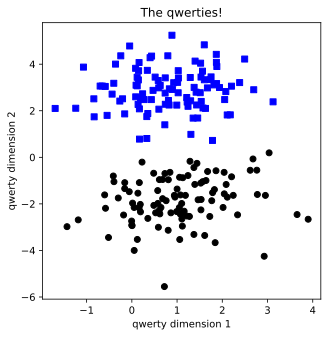

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [ ]:
# def createANNmodel(learningRate):

#   # model architecture
#   ANNclassify = nn.Sequential(
#       nn.Linear(2,16),  # input layer
#       nn.ReLU(),        # activation unit
#       nn.Linear(16,1),  # hidden layer
#       nn.ReLU(),        # activation unit
#       nn.Linear(1,1),   # output unit
#       nn.Sigmoid(),     # final activation unit
#         )

#   # loss function
#   lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

#   # optimizer
#   optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

#   # model output
#   return ANNclassify,lossfun,optimizer

In [26]:
def createANNmodel(learningRate):
  class SeqANN(nn.Module):
    def __init__(self):
      super().__init__()

      # input layer
      self.input = nn.Linear(2, 16)

      # hidden layers
      self.hidden1 = nn.Linear(16, 1)

      # output layer
      self.output = nn.Linear(1, 1)

    def forward(self, x):
      #input layer
      x = self.input(x) # It can be done step by step
      x = F.relu(x)

      # hidden layer
      x = F.relu(self.hidden1(x)) # It can also be done in one simpler line of code!

      # output layer
      x = torch.sigmoid(self.output(x))

      return x

  ANN = SeqANN()

  # loss function
  lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss (So theres no need for the sigmoid)

  # optimizer
  optimizer = torch.optim.SGD(ANN.parameters(),lr=learningRate)

  # model output
  return ANN,lossfun,optimizer

In [35]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: Wasn't this ">0" previously?!?!
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())

  return losses,predictions,totalacc

# Test the new code by running it once

Final accuracy: 99.5%


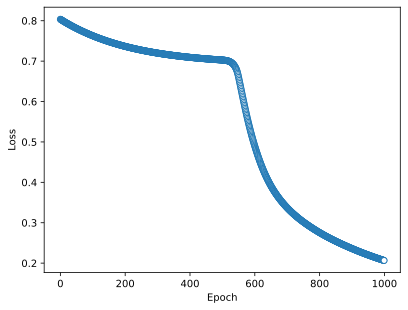

In [38]:
# create everything
ANN,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANN)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Now for the real test (varying learning rates)

In [40]:
# learning rates
learningrates = np.linspace(.001,.1,50)

# initialize
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# the loop
for i,lr in enumerate(learningrates):

  # create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  # store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

/tmp/ipython-input-2470188585.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


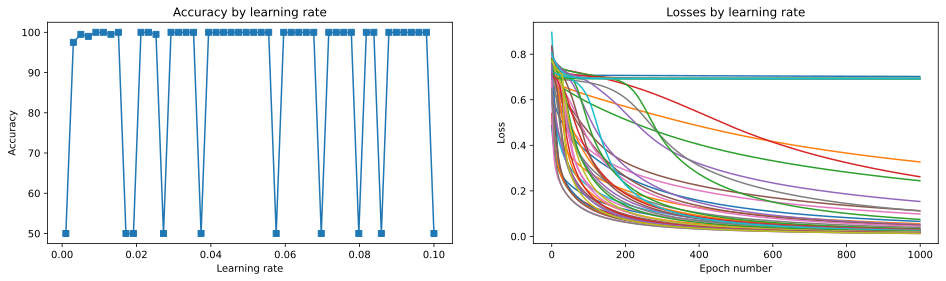

In [30]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [41]:
accByLR

[tensor(50.),
 tensor(98.5000),
 tensor(99.5000),
 tensor(50.),
 tensor(99.5000),
 tensor(100.),
 tensor(100.),
 tensor(99.5000),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(100.),
 tensor(100.),
 tensor(100.),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(100.)]

In [42]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.6800)